In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
def read_network(filepath: str) -> nx.Graph:
    graph = nx.Graph()
    with open(filepath) as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 2:
                graph.add_edge(parts[0], parts[1], weight=1)
            else:
                graph.add_edge(parts[0], parts[1], weight=float(parts[2]))
    return graph

In [3]:
def draw_network(G, title, n=50, kawai=True):
    degree_dict = dict(G.degree())
    if n is None:
        n = len(degree_dict)
    top_nodes = sorted(degree_dict, key=degree_dict.get, reverse=True)[:n]
    node_sizes = [degree_dict[node] * 50 for node in G.nodes()]

    clusters = list(nx.algorithms.community.greedy_modularity_communities(G, weight='Weight'))
    print(f"# clusters: {len(clusters)}")
    cluster_dict = {}
    for i, cluster in enumerate(clusters):
        for node in cluster:
            cluster_dict[node] = i

    cmap = plt.colormaps['Set3'].resampled(len(clusters))
    node_colors = [cmap(cluster_dict[node]) for node in G.nodes()]

    if kawai:
        pos = nx.kamada_kawai_layout(G)
    else:
        pos = nx.spring_layout(G, seed=0, k=1.0, scale=3)
    width = np.array(list(nx.get_edge_attributes(G, "weight").values()))
    norm_width = (width - np.min(width) + 1) / np.max(width) * 2

    plt.figure(figsize=(12, 12))
    nx.draw_networkx_edges(G, pos, alpha=0.4, width=norm_width)
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, edgecolors='black')

    labels = {node: node for node in top_nodes}
    nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='black')
    if n < len(degree_dict):
        title = f"{title} (Top {n} labeled)"
    plt.title(title, fontsize=14)
    plt.axis('off')
    plt.show()

# clusters: 3


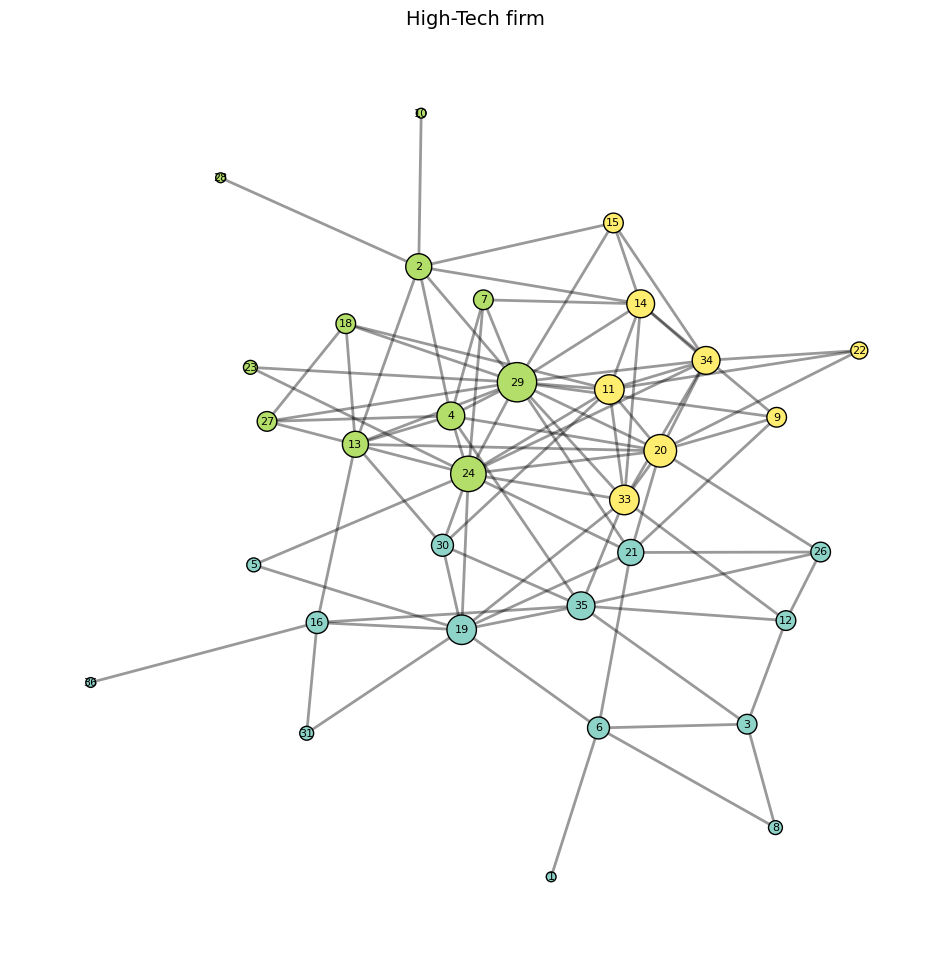

In [4]:
G = read_network('soc-firm-hi-tech.txt')
draw_network(G, "High-Tech firm")

# clusters: 3


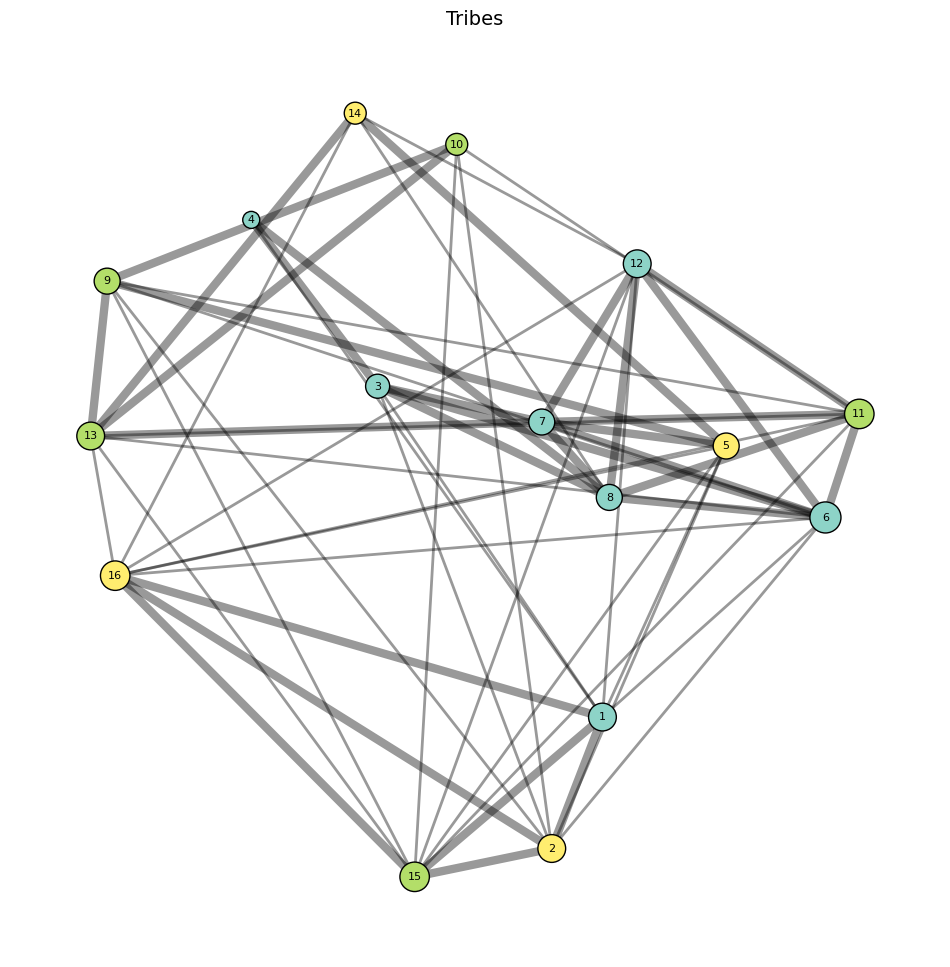

In [5]:
G = read_network('soc-tribes.edges')
draw_network(G, "Tribes", kawai=False)

strong connections in blue cluster, some strong connections between clusters

# clusters: 4


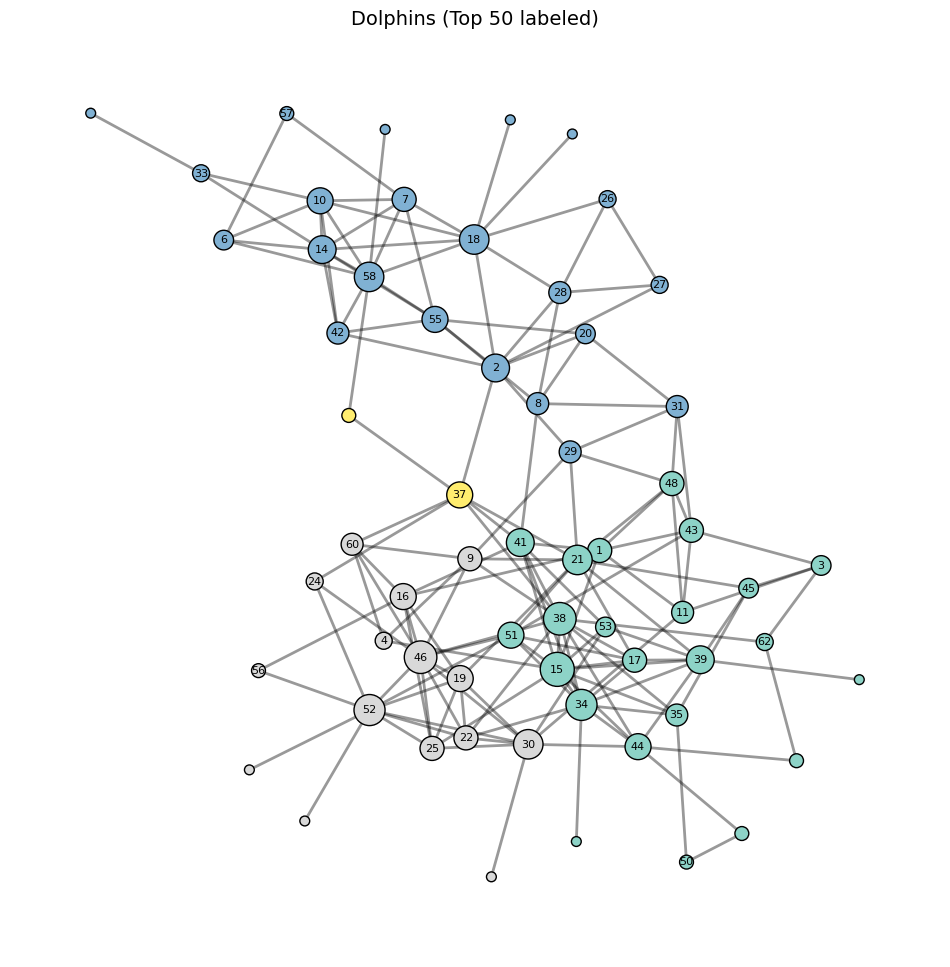

In [6]:
G = read_network('soc-dolphins.mtx')
draw_network(G, "Dolphins")

three similarly sized clusters and one tiny. some well connected nodes and then some with only one or two connections (outsiders)

# clusters: 2


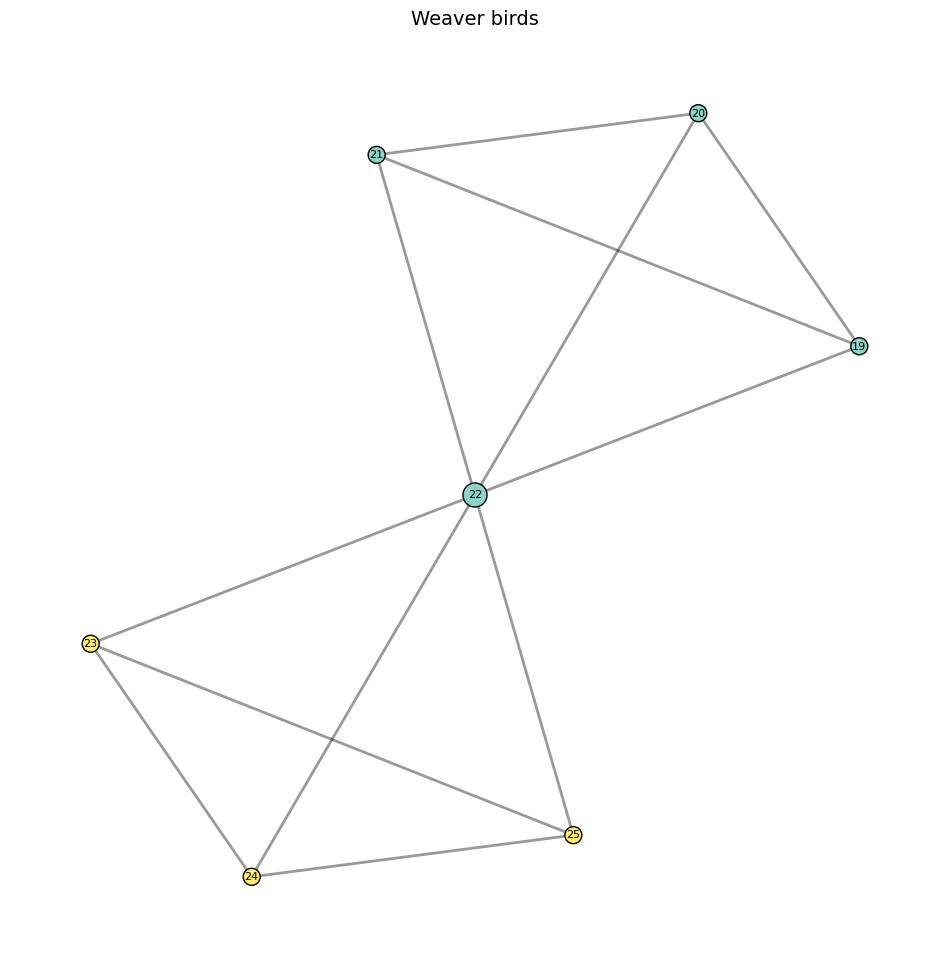

In [7]:
G = read_network('aves-weaver-social-01.edges')
draw_network(G, "Weaver birds")

two clusters/subgroups interacting only through one bird

# clusters: 1


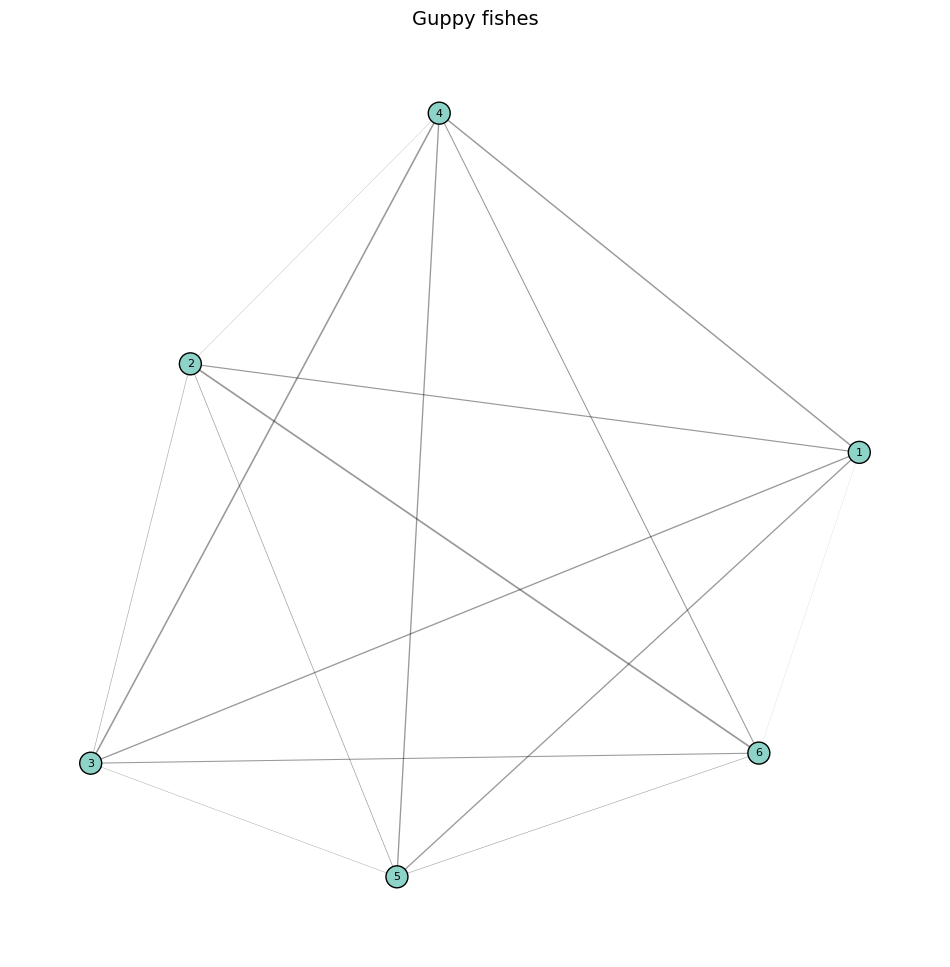

In [8]:
G = read_network('fish-guppy-familiar-1.edges')
draw_network(G, "Guppy fishes")